# Итоговая работа по математике

## Белоглазова А. Д.

# 0. [Введение]

Целью данной работы является анализ медицинских расходов на основе датасета, содержащего информацию о демографических и медицинских характеристиках пациентов, а также их индивидуальных расходах на медицинское страхование. В процессе работы будут проведены:

1. Анализ распределений признаков с тестированием гипотез по разнице сегментов.

2. Регрессионный анализ с оценкой модели методом МНК и тестированием её предпосылок.

3. Визуализация данных и результатов анализа.

Для выполнения поставленных задач был использован датасет Medical Cost Personal Datasets (https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download) с информацией о 1338 пациентах и 7 признаках. Он содержит информацию о демографических и медицинских характеристиках пациентов, а также их индивидуальные расходы на медицинское страхование.


# 1. [Установка библиотек]

In [1]:
!pip install mplcyberpunk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.backends.backend_pdf import PdfPages
import mplcyberpunk
plt.style.use(["dark_background", "cyberpunk"])
from scipy import stats
import scipy.stats as st
from tqdm import tqdm
from utils import *
from statsmodels.stats.diagnostic import het_white
%autosave 60

Autosaving every 60 seconds


# 1. [EDA] и [Теория вероятностей и математическая статистика]

## 1. 1 Чтение  и предобработка данных

In [3]:
df = pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
print('Информация о датасете:')
df.info()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
print(f'Количество дубликатов в датасете: {df.duplicated().sum()}')

Количество дубликатов в датасете: 1


In [6]:
df = df.drop_duplicates()

In [7]:
print(f'Количество пропущенных значений в датасете: {df.isnull().sum()}')

Количество пропущенных значений в датасете: age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Все данные в датасете представлены без пропусков, однако есть 1 дубликат, который был удалён.

In [8]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## 1.2. Анализ распределений признаков

## 1.2.1. Распределение медицинских расходов

Для анализа распределения медицинских расходов построим график с использованием гистограммы и KDE.

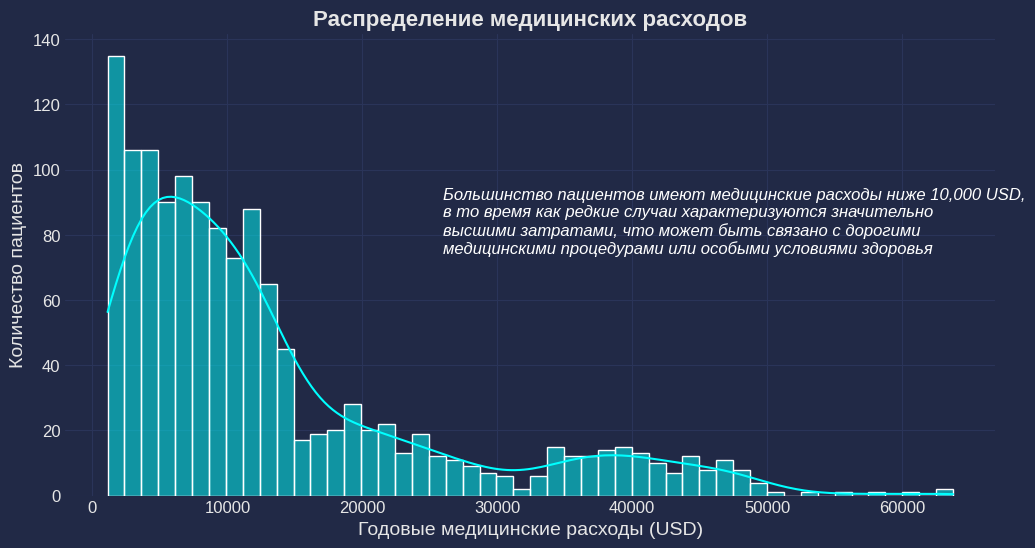

In [9]:
plt.figure(figsize=(12, 6))
text_for_plot = """
Большинство пациентов имеют медицинские расходы ниже 10,000 USD,
в то время как редкие случаи характеризуются значительно
высшими затратами, что может быть связано с дорогими
медицинскими процедурами или особыми условиями здоровья
"""
sns.histplot(df["charges"], bins=50, kde=True, color="cyan")
plt.title("Распределение медицинских расходов", fontsize=16, weight='bold')
plt.xlabel("Годовые медицинские расходы (USD)", fontsize=14)
plt.ylabel("Количество пациентов", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(26000, 100, text_for_plot, fontsize=12, ha='left', va='top', color='white', style='italic')
plt.show()

## 1.2.2. Распределение медицинских расходов по признаку курения

Для анализа влияния курения на расходы построим график плотности распределения для курящих и некурящих.

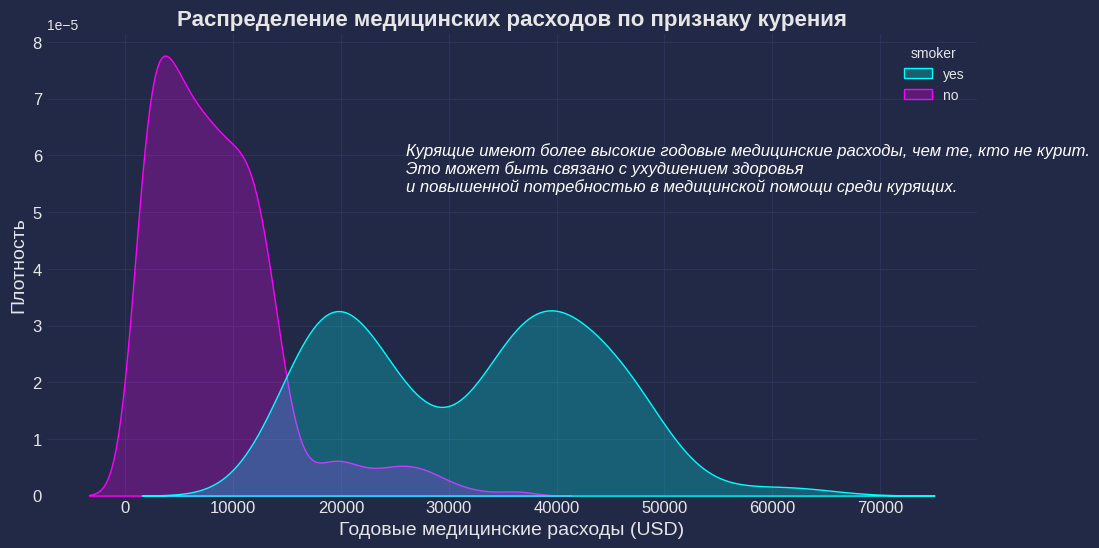

In [10]:
plt.figure(figsize=(12, 6))
text_for_plot = """
Курящие имеют более высокие годовые медицинские расходы, чем те, кто не курит.
Это может быть связано с ухудшением здоровья
и повышенной потребностью в медицинской помощи среди курящих.
"""
plt.text(26000, 0.00005, text_for_plot, fontsize=12, ha='left', va='bottom', color='white', style='italic')
sns.kdeplot(data=df, x="charges", hue="smoker", fill=True, common_norm=False, palette=["cyan", "magenta"])
plt.title("Распределение медицинских расходов по признаку курения", fontsize=16, weight="bold")
plt.xlabel("Годовые медицинские расходы (USD)", fontsize=14)
plt.ylabel("Плотность", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Сформулируем гипотезу:


*   H<sub>0</sub>: Распределение медицинских расходов у курящих и некурящих одинаково.
*   H<sub>1</sub>:  Распределение медицинских расходов у курящих и некурящих различается.

Для проверки гипотезы был проведём KS-тест:

In [11]:
smokers = df[df["smoker"] == "yes"]["charges"]
nonsmokers = df[df["smoker"] == "no"]["charges"]

ks_stat, ks_p_value = st.ks_2samp(smokers, nonsmokers)

print(f"KS статистика: {ks_stat}")
print(f"p-value: {ks_p_value}")

if ks_p_value < 0.05:
    print("Отвергаем H0: Распределения курящих и некурящих различаются.")
else:
    print("Не можем отвергнуть H0: Распределения курящих и некурящих не различаются.")

KS статистика: 0.8941502839367992
p-value: 1.3033252096337933e-191
Отвергаем H0: Распределения курящих и некурящих различаются.


**Вывод:** Отвергаем нулевую гипотезу, что распределения курящих и некурящих одинаковы. Курящие имеют значительно более высокие медицинские расходы.

Выдвину продуктовую гипотезу на основе проведенного анализа:
### Гипотеза для курящих пациентов:

**Гипотеза:** Курящие пациенты имеют более высокие медицинские расходы из-за повышенного риска хронических заболеваний (например, болезней сердца, легких и других).

**Предложение:** Ввести программы по отказу от курения, которые будут покрывать расходы на лечение зависимости от табака или профилактическое медицинское обслуживание.

**Эксперимент:** Запустить пилотный проект среди группы курящих пациентов, предлагая им программы для отказа от курения с последующим отслеживанием изменений в медицинских расходах. Можно также внедрить бонусы или скидки на страховые взносы для тех, кто проходит программу по отказу от курения.

## 1.2.3. Распределение медицинских расходов по половому признаку

Для анализа распределения медицинских расходов по половому признаку построим график плотности распределения, который покажет различия в расходах между мужчинами и женщинами.

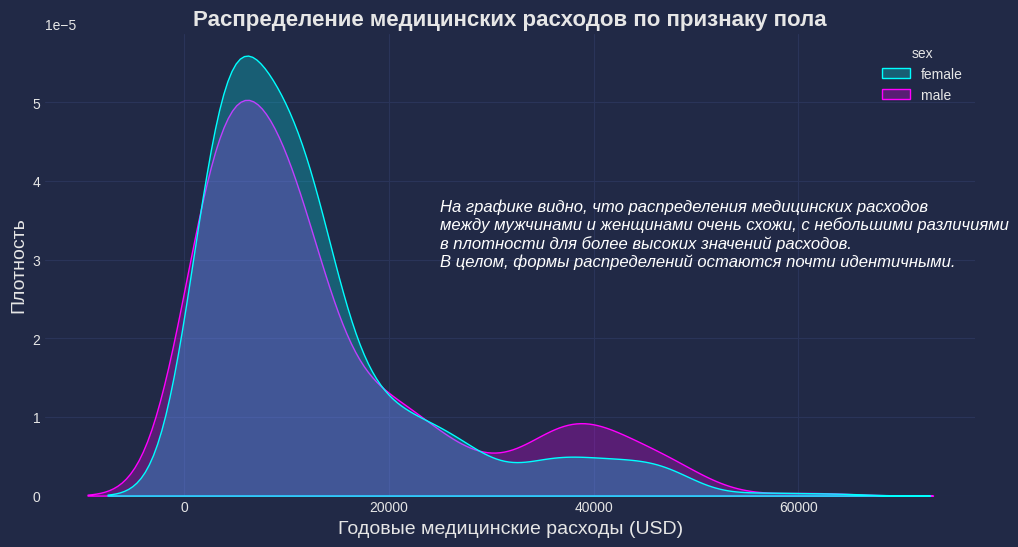

In [12]:
plt.figure(figsize=(12, 6))
text_for_plot = """
На графике видно, что распределения медицинских расходов
между мужчинами и женщинами очень схожи, с небольшими различиями
в плотности для более высоких значений расходов.
В целом, формы распределений остаются почти идентичными.
"""
plt.text(25000, 0.00004, text_for_plot, fontsize=12, ha='left', va='top', color='white', style='italic')
sns.kdeplot(data=df, x="charges", hue="sex", fill=True, common_norm=False, palette=["cyan", "magenta"])
plt.title("Распределение медицинских расходов по признаку пола", fontsize=16, weight="bold")
plt.xlabel("Годовые медицинские расходы (USD)", fontsize=14)
plt.ylabel("Плотность", fontsize=14)
plt.show()

**Сформулируеv гипотезу:**


*   H<sub>0</sub>: Распределения медицинских расходов среди мужчин и женщин одинаковы.
*   H<sub>1</sub>: Распределения медицинских расходов среди мужчин и женщин различаются.

Проведем KS-тест для проверки гипотезы:

In [13]:
males = df[df["sex"] == "male"]["charges"]
females = df[df["sex"] == "female"]["charges"]
ks_stat, ks_p_value = stats.ks_2samp(males, females)
print(f"KS-Statistic: {ks_stat}")
print(f"P-Value: {ks_p_value}")

if ks_p_value < 0.05:
    print("Отвергаем H0: Распределения медицинских расходов среди мужчин и женщин различаются.")
else:
    print("Не можем отвергнуть H0: Распределения медицинских расходов среди мужчин и женщин одинаковы.")

KS-Statistic: 0.07035470515833053
P-Value: 0.0683754115071638
Не можем отвергнуть H0: Распределения медицинских расходов среди мужчин и женщин одинаковы.


**Вывод:** Так как p-значение больше 0.05, это означает, что мы не можем отвергнуть нулевую гипотезу. То есть, мы не нашли статистически значимой разницы в распределениях расходов между мужчинами и женщинами. Распределения медицинских расходов для мужчин и женщин, скорее всего, одинаковы, и форма этих распределений не отличается на значимом уровне.

## 1.2.4. Распределение медицинских расходов в зависимости от индекса массы тела (BMI)

Для анализа зависимости медицинских расходов от индекса массы тела (BMI) постром график рассеяния.

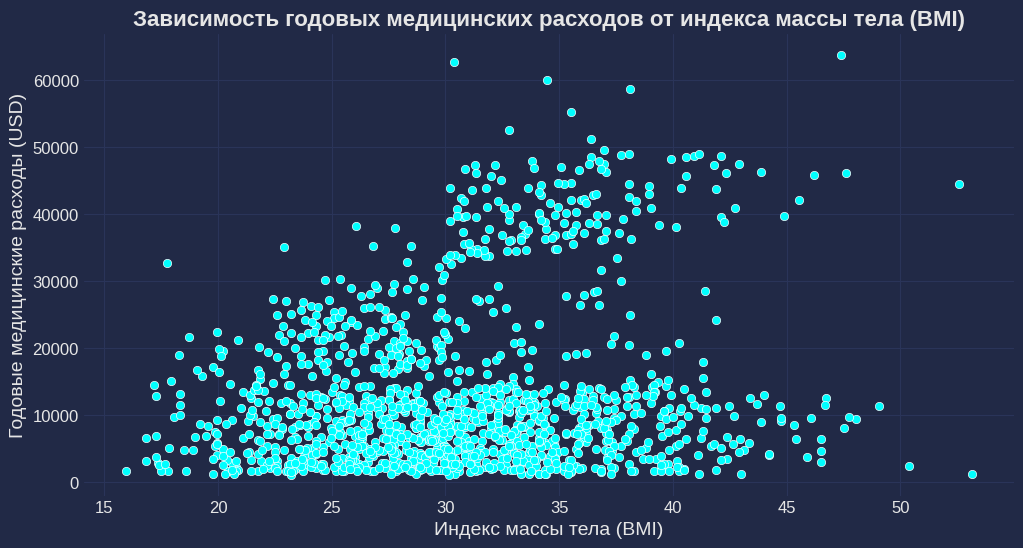

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['bmi'], y=df['charges'], color='cyan')
plt.title('Зависимость годовых медицинских расходов от индекса массы тела (BMI)', fontsize=16, weight='bold')
plt.xlabel('Индекс массы тела (BMI)', fontsize=14)
plt.ylabel('Годовые медицинские расходы (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

На графике видно, что между индексом массы тела (BMI) и годовыми медицинскими расходами существует слабая положительная зависимость. Чем выше BMI, тем чаще наблюдаются более высокие медицинские расходы, хотя эта связь не является очень сильной.

Рассчитаю корреляцию Пирсона между между BMI и годовыми медицинскими расходами

In [15]:
correlation = df["bmi"].corr(df["charges"])
print(f"Корреляция между BMI и годовыми медицинскими расходами: {correlation}")

Корреляция между BMI и годовыми медицинскими расходами: 0.19840083122624938


**Вывод:** Результат корреляции Пирсона между индексом массы тела (BMI) и годовыми медицинскими расходами (charges) составляет 0.1984, что указывает на слабую положительную линейную зависимость между этими переменными. Это означает, что с увеличением BMI существует слабое увеличение медицинских расходов, но эта зависимость не является сильной.

## 1.2.5. Распределение медицинских расходов в зависимости от региона

Для анализа распределения медицинских расходов в зависимости от региона построим боксплот, который позволяет наглядно увидеть медиану, квартильные значения, а также выбросы для каждой из групп.

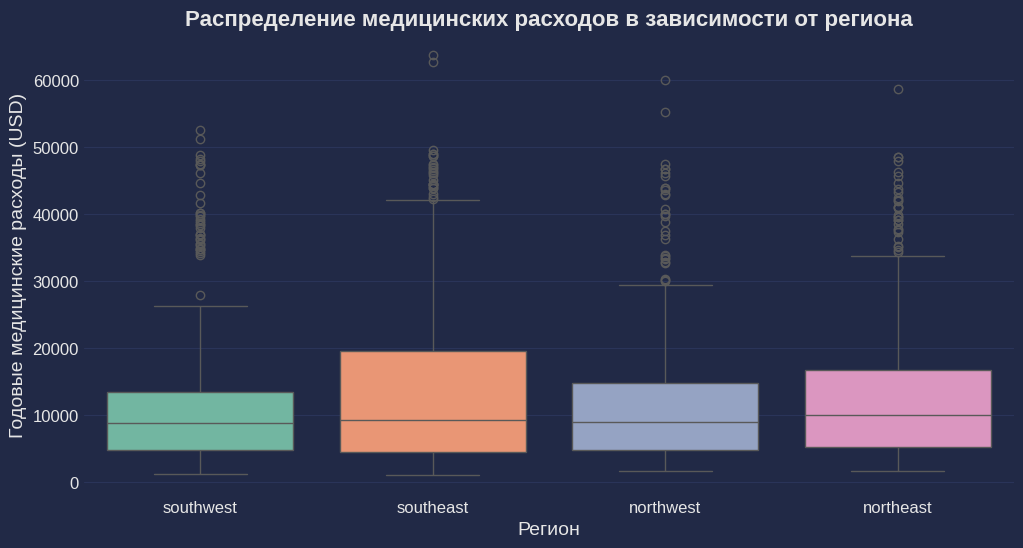

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="region", y="charges", palette="Set2")
plt.title("Распределение медицинских расходов в зависимости от региона", fontsize=16, weight="bold")
plt.xlabel("Регион", fontsize=14)
plt.ylabel("Годовые медицинские расходы (USD)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Из графика ожно заметить несколько интересных факторов:

1. Регион "southeast" имеет наибольшие расходы в сравнении с другими регионами. Верхний квартиль в этом регионе значительно выше, чем в других.

2. Регион "southwest" имеет самые низкие медианные расходы среди всех.

3. Во всех регионах присутствуют выбросы, что говорит о наличии людей с очень высокими медицинскими расходами.

4. Регион "northwest" имеет более широкие интервалы между квартилями, что может свидетельствовать о большем разнообразии в медицинских расходах.

**Сформулируем гипотезу:**
*   H<sub>0</sub>: Медицинские расходы не зависят от региона.
*   H<sub>1</sub>: Медицинские расходы различаются в зависимости от региона проживания.

Мы можем выдвинуть гипотезу, что из-за различий в уровне доступности и качества медицинских услуг, расходов на здравоохранение в разных регионах могут быть различия.

Для проверки гипотезы о различиях в медицинских расходах по регионам мы проведем ANOVA-тест, так как у нас есть несколько групп (районов), и мы хотим узнать, различаются ли их средние значения медицинских расходов.

In [17]:
anova_result = stats.f_oneway(
    df[df["region"] == "southwest"]["charges"],
    df[df["region"] == "southeast"]["charges"],
    df[df["region"] == "northwest"]["charges"],
    df[df["region"] == "northeast"]["charges"]
)


print(f"F-Statistic: {anova_result.statistic}")
print(f"P-Value: {anova_result.pvalue}")


if anova_result.pvalue < 0.05:
    print("Отвергаем H0: Медицинские расходы различаются в зависимости от региона.")
else:
    print("Не можем отвергнуть H0: Медицинские расходы не различаются в зависимости от региона.")

F-Statistic: 2.926139903662776
P-Value: 0.03276288025444947
Отвергаем H0: Медицинские расходы различаются в зависимости от региона.


**Вывод:** Результаты ANOVA-теста показали, что F-статистика составляет 2.9261, а p-значение — 0.0328. Поскольку p-значение меньше уровня значимости 0.05, мы отклоняем нулевую гипотезу. Это означает, что медицинские расходы статистически различаются в зависимости от региона.

Таким образом, можно сделать вывод, что различия в медицинских расходах между регионами имеют статистическую значимость, и эти различия могут быть связаны с факторами, такими как доступность и качество медицинских услуг в разных регионах.

Выдвину продуктовую гипотезу на основе проведенного анализа:

### Гипотеза о снижении медицинских расходов через региональные программы:

**Гипотеза:** Различия в медицинских расходах между регионами обусловлены не только социально-экономическими факторами, но и доступностью и качеством медицинских услуг. Регионы с высокими расходами (например, "southeast") могут страдать от более дорогих медицинских процедур, а регионы с низкими расходами (например, "southwest") — от недостаточного доступа к качественным медицинским услугам.

**Предложение:** Создать единый продукт для всех регионов, который предложит адаптированные медицинские услуги с учётом локальных потребностей. В регионах с высокими расходами можно предоставить программы по снижению стоимости лечения через профилактику и улучшение доступности, а в регионах с низкими расходами — улучшить доступность и качество медицинского обслуживания с использованием мобильных клиник, телемедицины и профилактических мероприятий.

**Эксперимент:** Запустить пилотный проект, предоставляющий скидки на медицинские услуги, профилактические осмотры и дополнительные пакеты для всех регионов. Для каждого региона будут предложены специфические предложения, которые могут снизить общие расходы на медицинское обслуживание. Эффективность проекта можно будет оценить, наблюдая за изменениями в расходах и уровне здоровья населения.


## 1.2.6. Распределение медицинских расходов в зависимости от количества детей

Для анализа распределения медицинских расходов в зависимости количества детей построим боксплот.

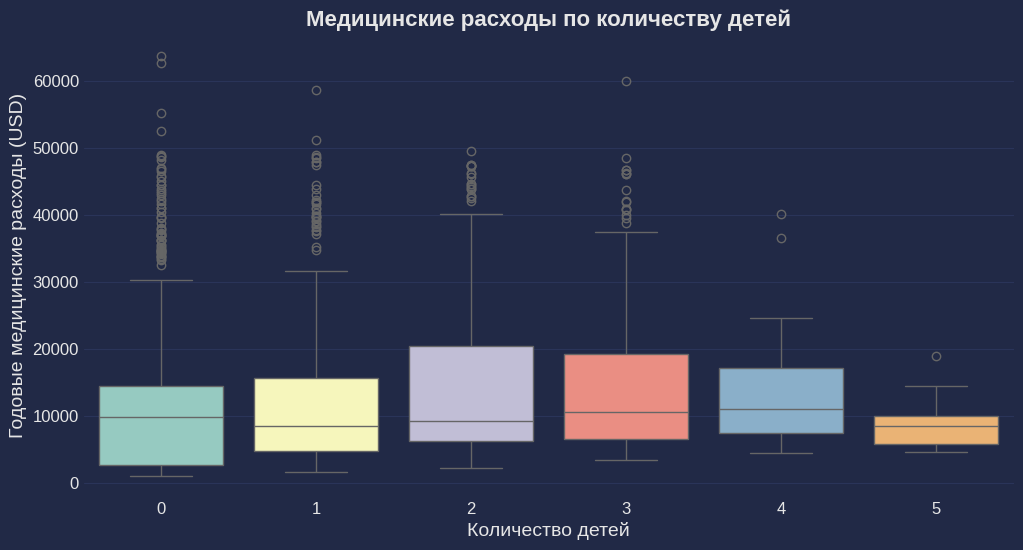

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="children", y="charges", palette="Set3")
plt.title("Медицинские расходы по количеству детей", fontsize=16, weight="bold")
plt.xlabel("Количество детей", fontsize=14)
plt.ylabel("Годовые медицинские расходы (USD)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Боксплот показывает, что с увеличением количества детей в семье, ежегодные медицинские расходы обычно растут. Для семей с 0 детьми расходы самые низкие, а для семей с 5 детьми — самые высокие. Распределение расходов более широкое для семей с 2, 3 и 4 детьми, что свидетельствует о большом разнообразии в расходах среди этих групп. В каждой группе есть выбросы, указывающие на наличие семей с крайне высокими медицинскими расходами.

**Сформулируем гипотезу:**
*   H<sub>0</sub>: Количество детей не влияет на годовые медицинские расходы.
*   H<sub>1</sub>: Количество детей влияет на годовые медицинские расходы.

Для проверки гипотезы используем ANOVA, так как у нас есть несколько групп (по количеству детей), и мы хотим узнать, различаются ли их средние значения медицинских расходов.

In [19]:
children_0 = df[df["children"] == 0]["charges"]
children_1 = df[df["children"] == 1]["charges"]
children_2 = df[df["children"] == 2]["charges"]
children_3 = df[df["children"] == 3]["charges"]
children_4 = df[df["children"] == 4]["charges"]
children_5 = df[df["children"] == 5]["charges"]

f_stat, p_value_anova = stats.f_oneway(children_0, children_1, children_2, children_3, children_4, children_5)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value_anova}")

if p_value_anova < 0.05:
    print("Отвергаем H0: Средние медицинские расходы для разных количеств детей различаются.")
else:
    print("Не можем отвергнуть H0: Средние медицинские расходы для разных количеств детей не различаются.")

F-Statistic: 3.2687344101195737
P-Value: 0.006133448188169501
Отвергаем H0: Средние медицинские расходы для разных количеств детей различаются.


**Вывод:** По результатам теста ANOVA, p-value составляет 0.0061, что меньше стандартного уровня значимости 0.05. Это позволяет нам отвергнуть нулевую гипотезу о том, что средние медицинские расходы одинаковы для разных количеств детей. Следовательно, можно сделать вывод, что количество детей действительно влияет на уровень медицинских расходов.

Выдвину продуктовую гипотезу на основе проведенного анализа:
### Гипотеза для семей с детьми:

**Гипотеза:** Семьи с большим количеством детей имеют более высокие медицинские расходы, так как дети часто нуждаются в медицинских услугах (вакцинация, хронические заболевания, травмы и т.д.).

**Предложение:** Для таких групп можно предложить семейные страховки с дополнительными скидками или расширенными пакетами услуг, которые будут включать в себя профилактическое обслуживание для детей и профилактику заболеваний.

**Эксперимент:** Можно запустить акции или специальные пакеты медицинского страхования для многодетных семей с включением дополнительных услуг для детей, и отслеживать, как это влияет на общие расходы.

## 1.2.7. Распределение медицинских расходов в зависимости от возраста

Для анализа зависимости медицинских расходов от возраста и статуса курения был построен интерактивный график рассеяния. На графике отображены точки, которые показывают, как меняются медицинские расходы с возрастом для курящих и некурящих пациентов. Каждая точка представляет собой данные о пациенте, где цвет обозначает его статус курящего (синий — курящий, красный — некурящий). Этот график позволяет визуально оценить, как возраст влияет на расходы в обеих группах и выявить возможные различия в расходах между курящими и некурящими.

In [20]:
import plotly.express as px

fig = px.scatter(df,
                 x="age",
                 y="charges",
                 color="smoker",
                 title="Зависимость расходов от возраста и курения",
                 labels={"age": "Возраст", "charges": "Годовые медицинские расходы (USD)", "smoker": "Курящий"})

fig.update_layout(
    template="plotly_dark",
    width=1200,
    height=600,
    title_font=dict(size=20, color="white", family="Verdana"),
    title_x=0.5,
    xaxis_title_font=dict(size=14, color="white"),
    yaxis_title_font=dict(size=14, color="white"),
    legend_title_font=dict(size=14, color="white"),
    legend=dict(font=dict(size=12, color="white"))
)

fig.show()

In [22]:
smokers = df[df["smoker"] == "yes"]
nonsmokers = df[df["smoker"] == "no"]


### Корреляция Пирсона для курящих




In [23]:
correlation_smokers = smokers["age"].corr(smokers["charges"])
print(f"Корреляция Пирсона для курящих: {correlation_smokers}")

Корреляция Пирсона для курящих: 0.36822444373077773


### Корреляция Пирсона для некурящих

In [24]:
correlation_nonsmokers = nonsmokers["age"].corr(nonsmokers["charges"])
print(f"Корреляция Пирсона для некурящих: {correlation_nonsmokers}")

Корреляция Пирсона для некурящих: 0.6274002231304533


Корреляция Пирсона для курящих — 0.368, что говорит о слабой положительной зависимости между возрастом и медицинскими расходами. То есть, у курящих с возрастом расходы немного растут, но связь не слишком сильная.

Для некурящих корреляция — 0.627, что указывает на более сильную зависимость. У некурящих с возрастом расходы растут предсказуемо.

**Вывод:** Возраст оказывает большее влияние на расходы у некурящих, чем у курящих. Курение уже сильно влияет на здоровье, поэтому у курящих зависимость расходов от возраста не такая выраженная.

# 2. [Регрессионный анализ]

## 2. 1. Подготовка данных

In [25]:
df_encoded = pd.get_dummies(df[['smoker', 'region']], drop_first=True)

In [26]:
X = pd.concat([df[['age', 'bmi', 'children']], df_encoded], axis=1)

In [27]:
X = X.apply(pd.to_numeric, errors='coerce')

In [28]:
X = X.astype(int)

In [29]:
y = df['charges']

In [30]:
y = pd.to_numeric(y, errors='coerce')

In [31]:
X.isnull().sum(), y.isnull().sum()

(age                 0
 bmi                 0
 children            0
 smoker_yes          0
 region_northwest    0
 region_southeast    0
 region_southwest    0
 dtype: int64,
 np.int64(0))

## 2. 2 Построение и оценка модели OLS

In [32]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     571.7
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:47:18   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1329   BIC:                         2.713e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.179e+04    966.501  

Модель объясняет 75.1% вариации в медицинских расходах. Возраст, BMI, курение и количество детей значительно влияют на расходы, при этом курящие пациенты имеют значительно более высокие расходы. Регионы тоже оказывают влияние, но эффект для северо-западного региона незначителен. Остатки модели имеют небольшие отклонения, что может указывать на выбросы.

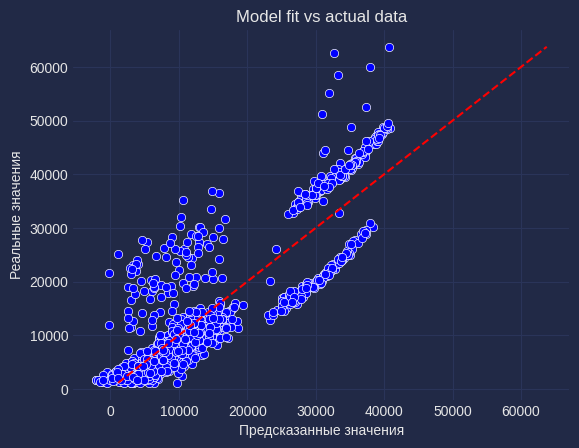

In [33]:
predicted_values = model.fittedvalues
actual_values = y
sns.scatterplot(x=model.fittedvalues, y=y, c='b')
sns.lineplot(x=y, y=y, c='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Реальные значения')
plt.title('Model fit vs actual data')
plt.show()

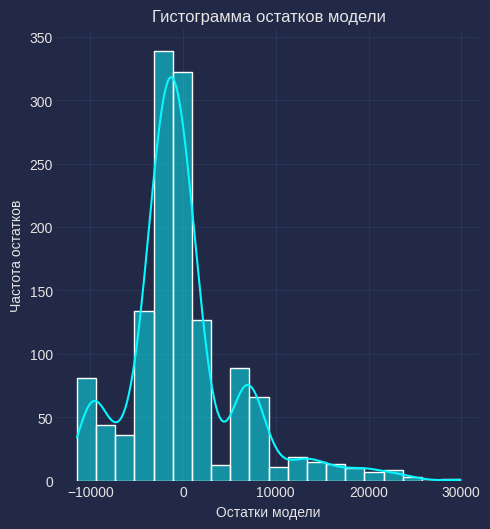

In [34]:
sns.displot(model.resid, bins=20, kde=True)
plt.xlabel('Остатки модели')
plt.ylabel('Частота остатков')
plt.title('Гистограмма остатков модели')
plt.show()

График показывает, что остатки модели в целом близки к нормальному распределению, но правый хвост указывает на наличие выбросов. Это может означать,что модель не учитывает все факторы или что выбросы сильно влияют на результаты.

## 2. 3 Проверка на мультиколлинеарность

График показывает, что остатки модели в целом близки к нормальному распределению, но правый хвост указывает на наличие выбросов. Это может означать,что модель не учитывает все факторы или что выбросы сильно влияют на результаты.

Проведем проверку на мультиколлинеарность. Для этого сформулируем две гипотезы:
* H<sub>0</sub>: Нет мультиколлинеарности между независимыми переменными.
* H<sub>1</sub>:  Присутствует мультиколлинеарность между независимыми переменными.

Для этого проведем тест Variance Inflation Factor (VIF), позволяет измерить, насколько сильно увеличивается дисперсия коэффициента регрессии, когда переменные сильно коррелируют между собой.

In [35]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

           Variable        VIF
0             const  33.978138
1               age   1.016024
2               bmi   1.105533
3          children   1.003652
4        smoker_yes   1.006395
5  region_northwest   1.517631
6  region_southeast   1.652957
7  region_southwest   1.529471


Построим матрицу корреляции признаков:

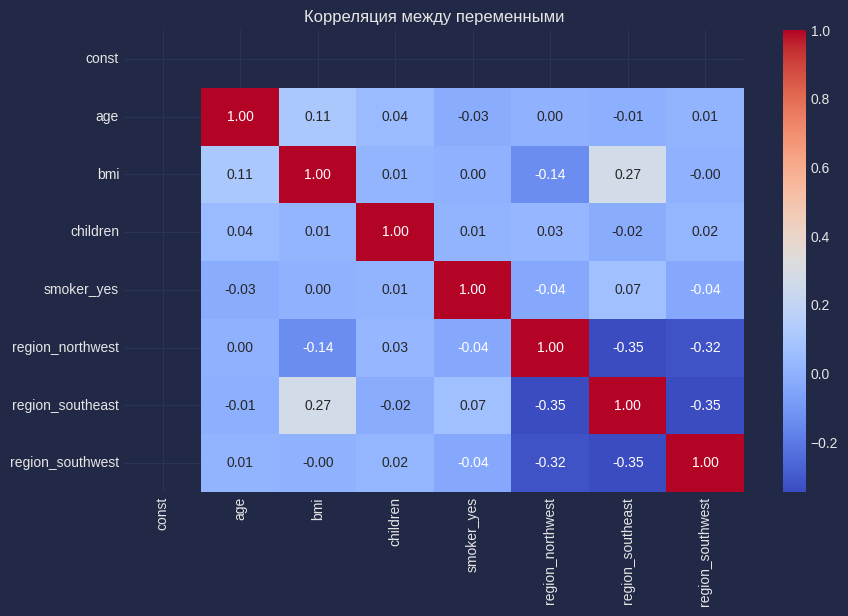

In [36]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Корреляция между переменными")
plt.show()

**Вывод:** Переменные не имеют сильной корреляции друг с другом, и их влияние на модель независимы, что позволяет нам уверенно использовать их в модели без необходимости корректировать.

## 2. 4 Проверка на гетероскедастичность

Проведем проверку на гетероскедатичность. Для этого сформулируем две гипотезы:

* H<sub>0</sub>: Гетероскедатичность отсутствует.
* H<sub>1</sub>: Присутствует гетероскедатичность.

Проверим их с помощью теста Уайта:



In [37]:
vals = het_white(model.resid, X)
print("p-value теста Уайта:", vals[1])

p-value теста Уайта: 7.551644619371819e-17


Результат теста Уайта (p-value = 7.55e-17) показывает наличие гетероскедастичности, что означает, что разброс ошибок изменяется с изменением значений переменных. Это может искажать результаты модели. Для коррекции можно использовать робастные стандартные ошибки.

## 2. 5 Модели с логарифмированной зависимой переменной (Log-transformed model)

В данных была обнаружена гетероскедастичность, что могло бы искажать результаты модели. Чтобы справиться с этим, я выбрала логарифмированную модель. Логарифмирование зависимой переменной помогает уменьшить влияние выбросов и стабилизировать дисперсию ошибок, улучшая точность предсказаний и корректность статистических выводов.

In [38]:
y_log = np.log(y)
model_log = sm.OLS(y_log, X).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     621.8
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:48:26   Log-Likelihood:                -812.09
No. Observations:                1337   AIC:                             1640.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0077      0.071  

Эта модель (с R-squared = 0.766) лучше предыдущей (0.751), так как она объясняет больше вариации в данных. Все ключевые факторы (возраст, BMI, дети, курение) остаются значимыми, а регионы также оказывают влияние. Модель с логарифмированием зависимой переменной показала более точные прогнозы и лучше справляется с выбросами и гетероскедастичностью, обеспечивая более стабильные результаты.

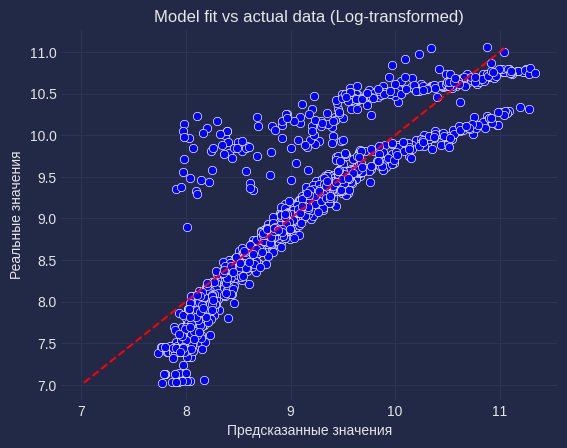

In [39]:
sns.scatterplot(x=model_log.fittedvalues, y=y_log, c='b')
sns.lineplot(x=y_log, y=y_log, c='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Реальные значения')
plt.title('Model fit vs actual data (Log-transformed)')
plt.show()

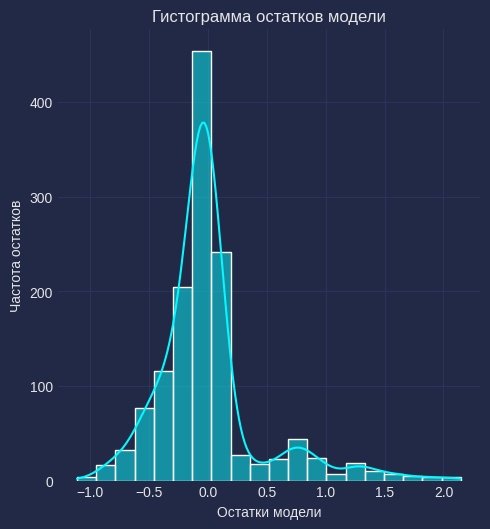

In [40]:
sns.displot(model_log.resid, bins=20, kde=True)
plt.xlabel('Остатки модели')
plt.ylabel('Частота остатков')
plt.title('Гистограмма остатков модели')
plt.show()

Этот график также показывает, что остатки модели в целом близки к нормальному распределению, но правый хвост все также указывает на наличие выбросов.

#3. [Заключение]

В ходе работы мы исследовали, как различные факторы (пол, возраст, индекс массы тела, курение, количество детей и регион) влияют на медицинские расходы. Построенная линейная модель показала хорошие результаты, но была выявлена проблема гетероскедастичности, что могло искажать выводы.

Для решения этой проблемы была выбрана логарифмированная модель, которая значительно улучшила точность предсказаний. Логарифмирование стабилизировало дисперсию ошибок и уменьшило влияние выбросов, что сделало модель более надежной.

Также была проведена проверка на мультиколлинеарность, и модель показала, что переменные не сильно коррелируют между собой, что позволяет оставлять их в модели.

В результате, логарифмированная модель оказалась наиболее подходящей для предсказания медицинских расходов, так как она лучше справляется с гетероскедастичностью и выбросами, обеспечивая более точные и стабильные результаты.